In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')

In [11]:
df = pd.read_csv('StudentsPerformance.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [12]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [13]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [14]:
print("\nSummary Stats:")
print(df.describe())


Summary Stats:
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


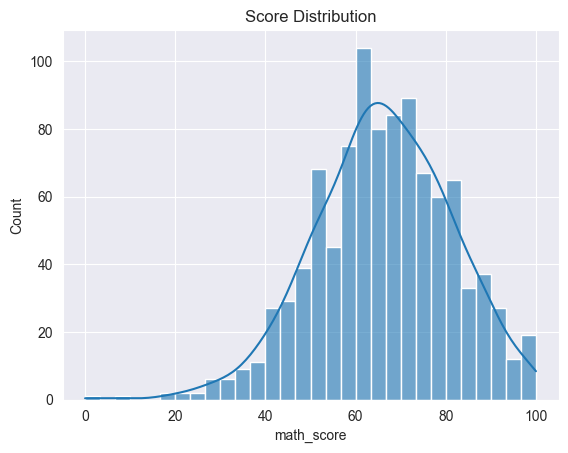

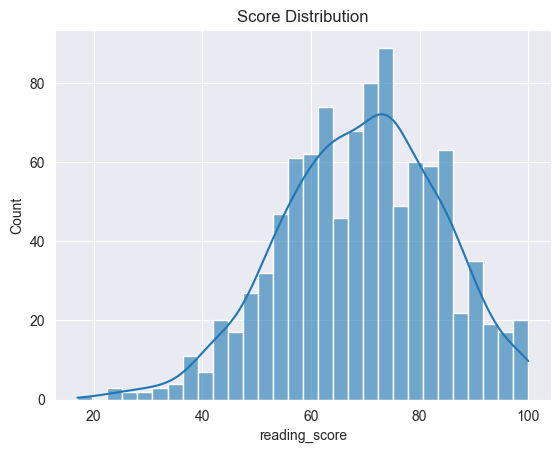

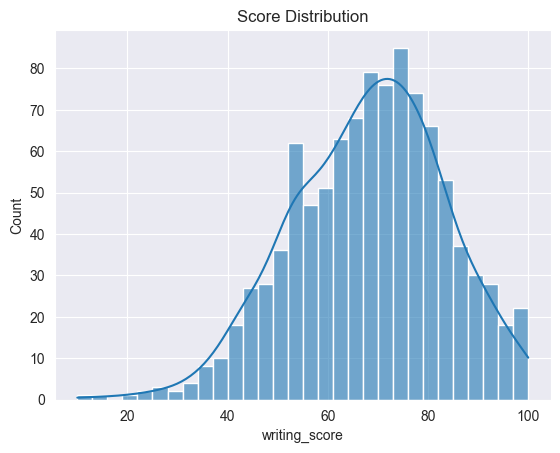

In [22]:
score_cols = ['math_score', 'reading_score', 'writing_score']
for col in score_cols:
    sns.histplot(df[col], kde=True, alpha =0.6, bins=30)
    plt.title(f'Score Distribution')
    plt.show()

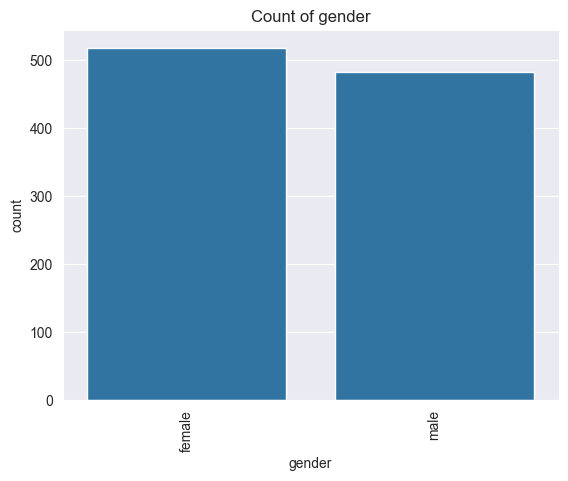

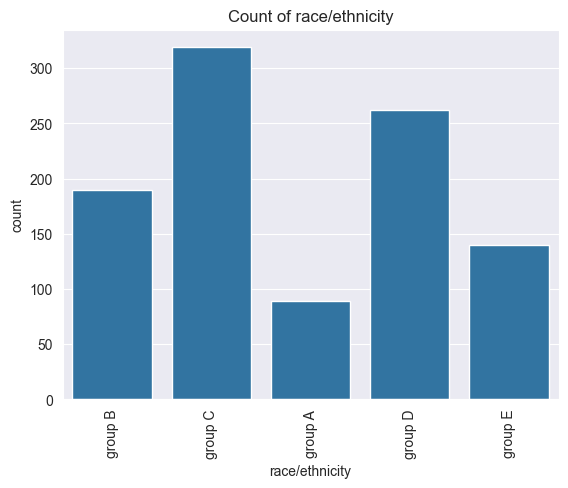

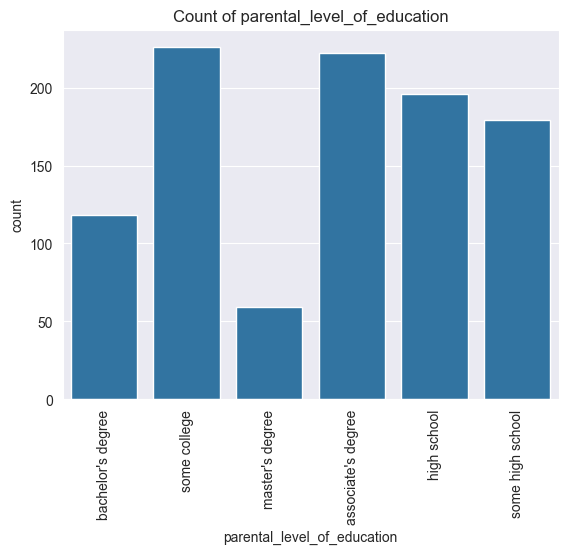

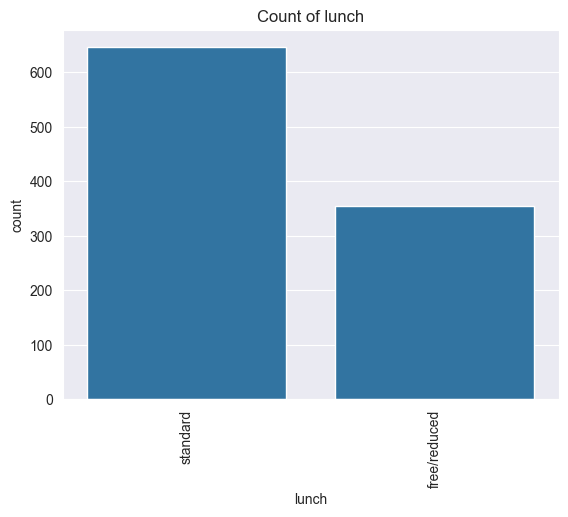

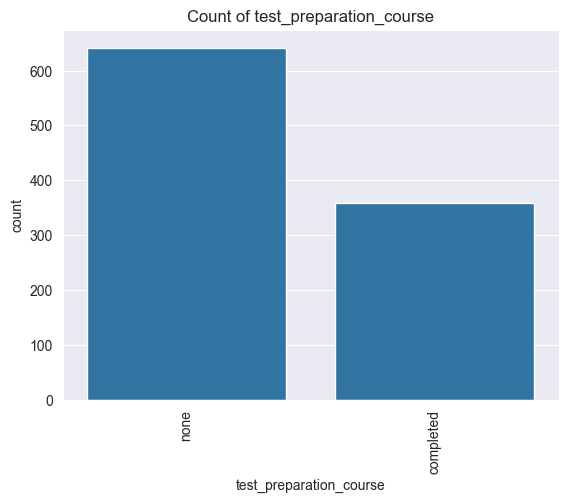

In [23]:
cat_col = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
for col in cat_col:
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

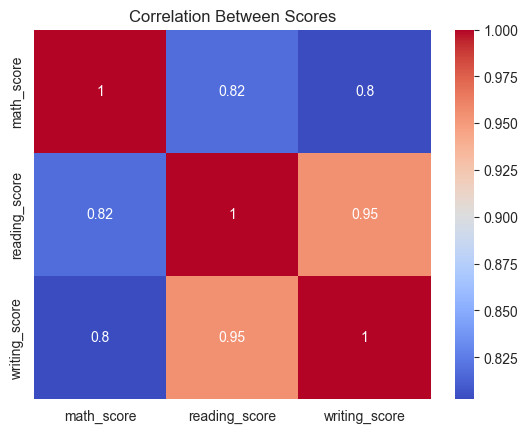

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()

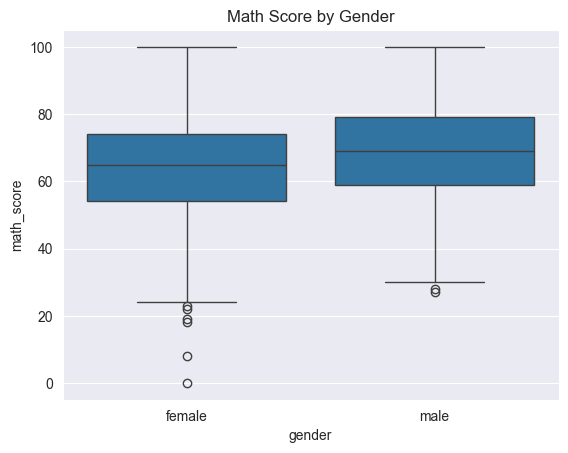

In [25]:
sns.boxplot(data=df, x='gender', y='math_score')
plt.title('Math Score by Gender')
plt.show()

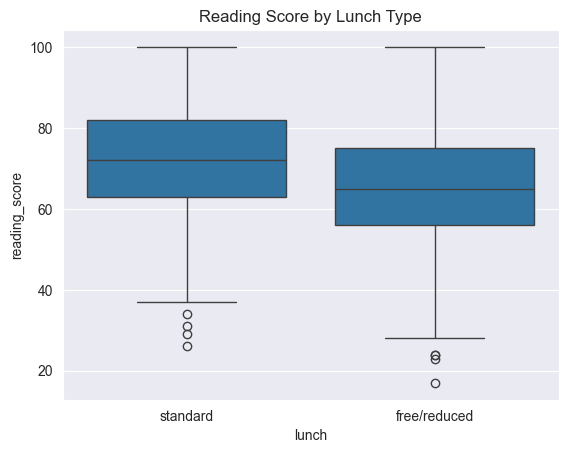

In [26]:
sns.boxplot(data=df, x='lunch', y='reading_score')
plt.title('Reading Score by Lunch Type')
plt.show()

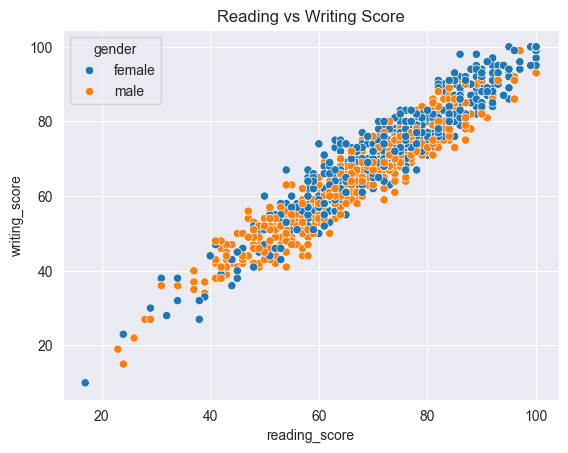

In [27]:
sns.scatterplot(data=df, x='reading_score', y='writing_score', hue='gender')
plt.title('Reading vs Writing Score')
plt.show()

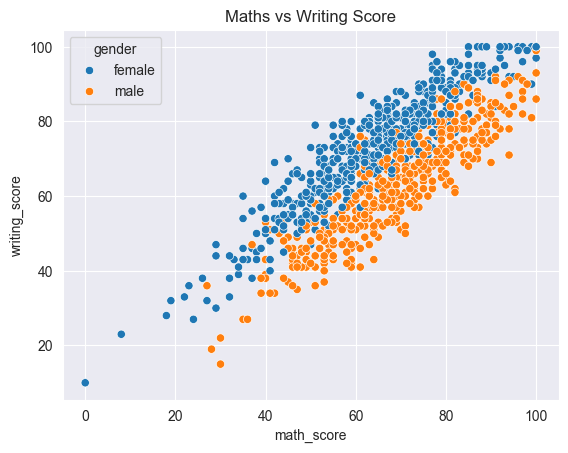

In [32]:
sns.scatterplot(data=df, x='math_score', y='writing_score', hue='gender')
plt.title('Maths vs Writing Score')
plt.show()

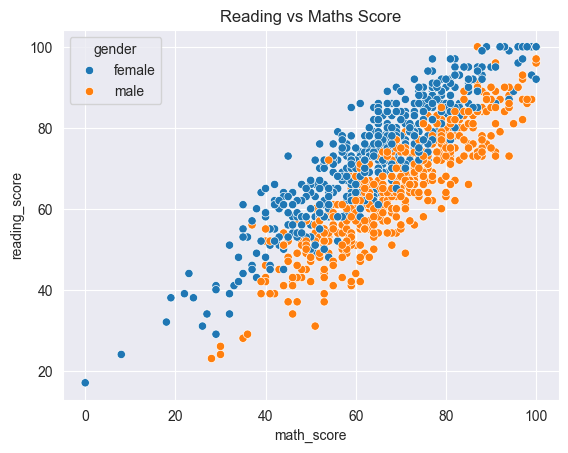

In [31]:
sns.scatterplot(data=df, x='math_score', y='reading_score', hue='gender')
plt.title('Reading vs Maths Score')
plt.show()

In [36]:
X = df.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y = df[['math_score', 'reading_score', 'writing_score']]

X_dummies = pd.get_dummies(X, drop_first=True)

In [37]:
X_dummies.head()

gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0        False                    True                   False   
1        False                   False                    True   
2        False                    True                   False   
3         True                   False                   False   
4         True                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   parental_level_of_education_bachelor's degree  \
0                                           True   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   parental_level_of_education_high school  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   parental_level_of_education_master's degree  \
0                                        False   
1                                        False   
2                                         True   
3                                        False   
4                                        False   

   parental_level_of_education_some college  \
0                                     False   
1                                      True   
2                                     False   
3                                     False   
4                                      True   

   parental_level_of_education_some high school  lunch_standard  \
0                                         False            True   
1                                         False            True   
2                                         False            True   
3                                         False           False   
4                                         False            True   

   test_preparation_course_none  
0                          True  
1                         False  
2                          True  
3                          True  
4                          True

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=42)

In [65]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
print(lm.intercept_)

[59.4666417  72.47689206 72.77602383]


In [67]:
lm_prediction = lm.predict(X_test)

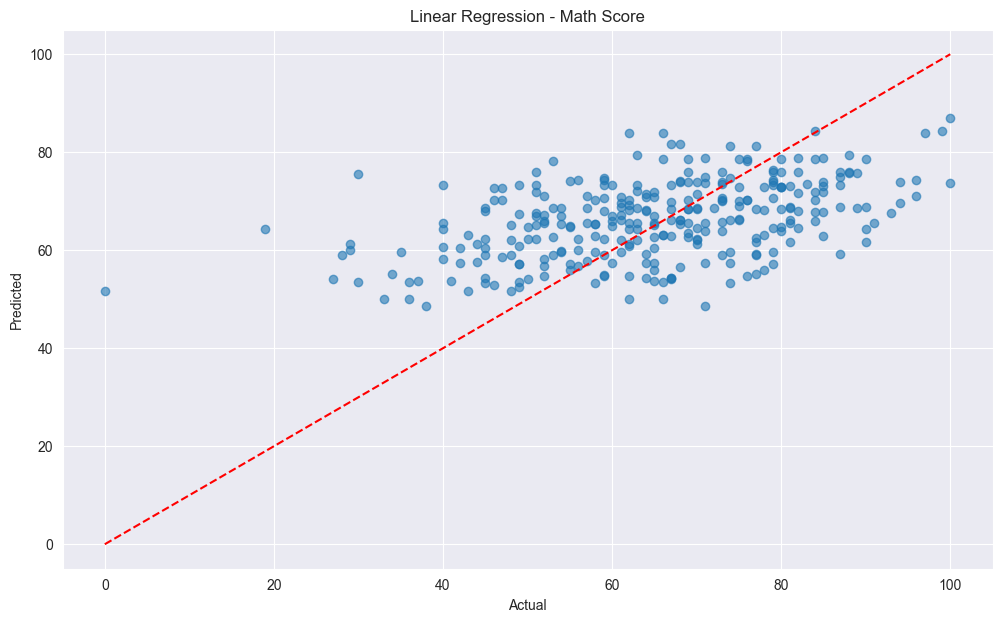

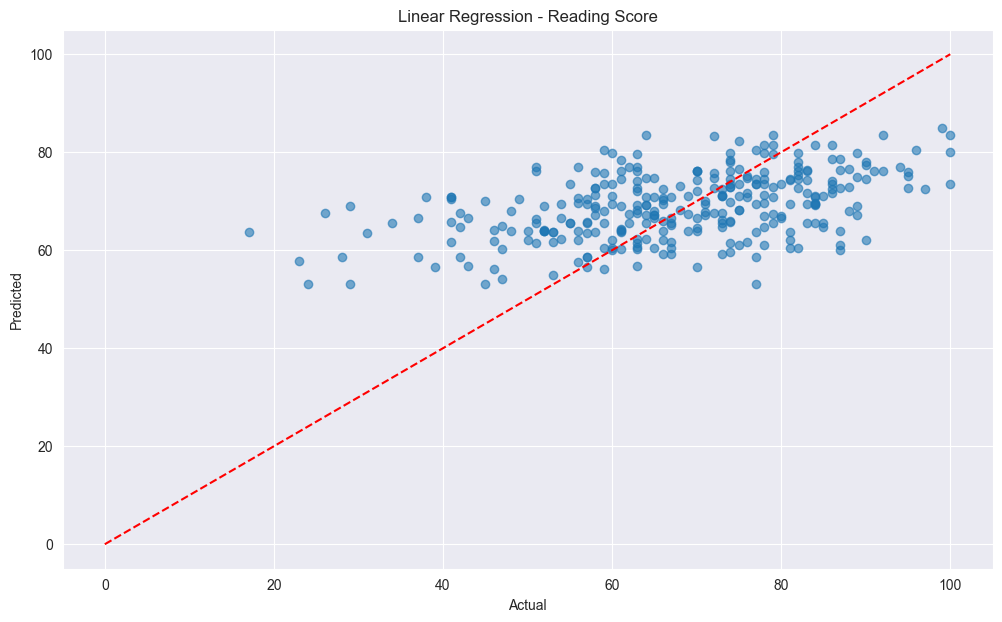

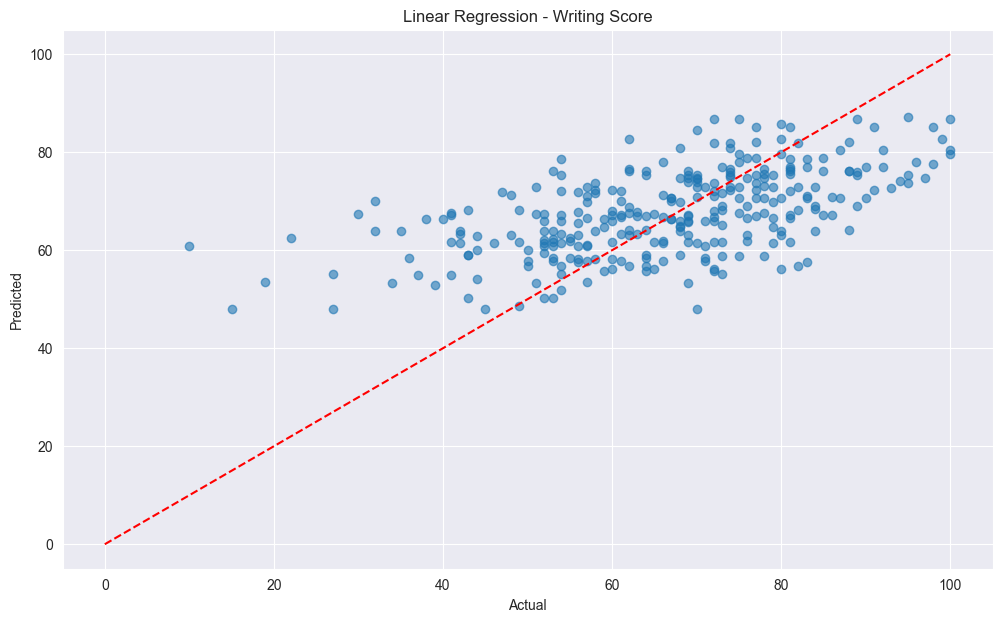

In [68]:
for i, subject in enumerate(['Math', 'Reading', 'Writing']):
    plt.figure(figsize=(12,7))
    plt.scatter(y_test.iloc[:, i], lm_prediction[:, i], alpha=0.6)
    plt.plot([0, 100], [0, 100], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Linear Regression - {subject} Score')
    plt.grid(True)
    plt.show()

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("\nLinear Regression:")
print("R2 Score (per target):", r2_score(y_test, lm_prediction))
print("RMSE:", mean_squared_error(y_test, lm_prediction,))
print("MAE:", mean_absolute_error(y_test, lm_prediction))


Linear Regression:
R2 Score (per target): 0.2506813219780966
RMSE: 186.205896119436
MAE: 10.8478893945328
